In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc

In [4]:
font = {'size'   : 16}
rc('font', **font)

In [5]:
folder = 'logs/ip/'
nQueries = 100
nExperiments = 4
nTrials = 10

In [6]:
avgAcc = np.zeros(nQueries)
with open('logs/ip/avgacc.txt') as f:
  lines = f.readlines()
  for i, line in enumerate(lines):
    avgAcc[i] = float(line)
    
minAcc = np.zeros(nQueries)
with open('logs/ip/minacc.txt') as f:
  lines = f.readlines()
  for i, line in enumerate(lines):
    minAcc[i] = float(line)

In [7]:
def loadFile(i=1):
  slowAcc = np.zeros((nExperiments, nQueries))
  fastAcc = np.zeros((nExperiments, nQueries))
  slowOps = np.zeros((nExperiments, nQueries))
  fastOps = np.zeros((nExperiments, nQueries))
  file = folder + 'output{}.txt'.format(i)
  with open(file, 'r') as f:
    lines = f.readlines()
    iExp = -1
    for line in lines:
      if line[:4] == 'Samp':
        iExp += 1
        iQuer = 0
      elif len(line) > 20:
        tokens = line.replace(',','').split()
        if tokens[0] == 'SlowTournament:':
          slowAcc[iExp, iQuer] = float(tokens[2])
          slowOps[iExp, iQuer] = float(tokens[3])
        elif tokens[0] == 'FastTournament:':
          fastAcc[iExp, iQuer] = float(tokens[2])
          fastOps[iExp, iQuer] = float(tokens[3])
          iQuer += 1
  return slowAcc, slowOps, fastAcc, fastOps
    
# print(loadFile(1))

In [8]:
slowAcc = np.zeros((nExperiments, nQueries, nTrials))
slowOps = np.zeros((nExperiments, nQueries, nTrials))
fastAcc = np.zeros((nExperiments, nQueries, nTrials))
fastOps = np.zeros((nExperiments, nQueries, nTrials))
for i in range(1, nTrials+1):
  a, b, c, d = loadFile(i)
  slowAcc[:,:,i-1] = a
  slowOps[:,:,i-1] = b
  fastAcc[:,:,i-1] = c
  fastOps[:,:,i-1] = d
  
slowAccAvg = np.mean(slowAcc, axis=2)
slowAccStd = np.std(slowAcc, axis=2)
slowOpsAvg = np.mean(slowOps, axis=2)
fastAccAvg = np.mean(fastAcc, axis=2)
fastAccStd = np.std(fastAcc, axis=2)
fastOpsAvg = np.mean(fastOps, axis=2)

In [69]:
def plotExperiment(i, title='TBD'):
  slowA = slowAccAvg[i,:]
  slowS = slowAccStd[i,:]
  fastA = fastAccAvg[i,:]
  fastS = fastAccStd[i,:]
  slowO = slowOpsAvg[i,:]
  fastO = fastOpsAvg[i,:]
  plt.figure(figsize=(8,6))
  plt.plot(slowA, label='Tournament')#       ({} Ops)'.format(int(np.mean(slowO))))
  plt.fill_between(np.arange(nQueries), y1=slowA-slowS, y2=slowA+slowS, alpha=0.2)
  plt.plot(fastA, label='FastTournament')# ({} Ops)'.format(int(np.mean(fastO))))
  plt.fill_between(np.arange(nQueries), y1=fastA-fastS, y2=fastA+fastS, alpha=0.2)
  plt.plot(minAcc, label='Nearest Neighbor Distance', color='red', linestyle='--')
  plt.plot(avgAcc, label='Average Distance', color='gray', linestyle='--')
  plt.title(title)
  plt.xlabel('Queries')
  plt.ylabel('TV Distance')
  plt.legend(loc=(.38,.60), framealpha=0.7)
  plt.tight_layout()
  plt.savefig('plots/ip_{}.jpg'.format(i), dpi=300)

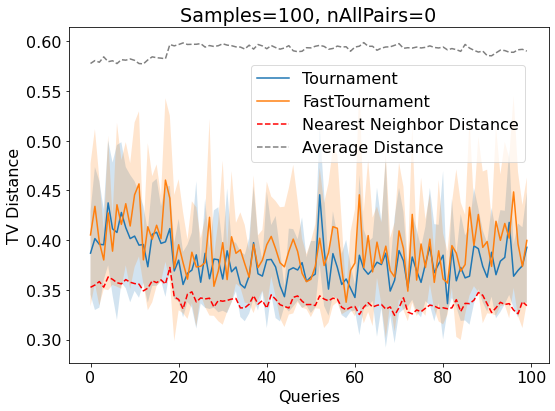

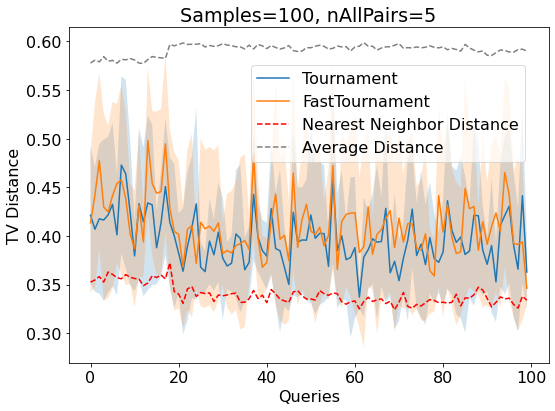

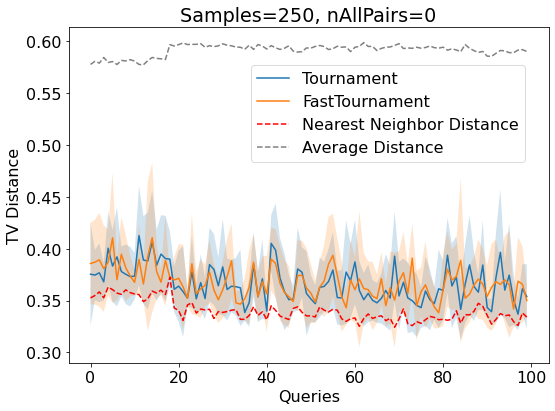

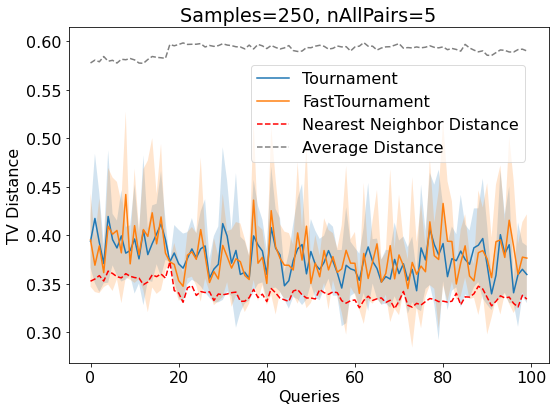

In [70]:
plotExperiment(0, 'Samples=100, nAllPairs=0')
plotExperiment(1, 'Samples=100, nAllPairs=5')
plotExperiment(2, 'Samples=250, nAllPairs=0')
plotExperiment(3, 'Samples=250, nAllPairs=5')

In [73]:
print(np.mean(slowOpsAvg, axis=1))
print(np.mean(fastOpsAvg, axis=1))

[204700.  284510.  511750.  710554.5]
[ 40820.  120291.9 102050.  300612. ]


In [76]:
print(np.mean(slowAccAvg[0]))
print(np.mean(slowAccAvg[1]))

0.3782231628737989
0.39740621171259216
